# Importing libraries

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score

import plotly.offline as pyo
import plotly.graph_objs as go

import re

from nltk.stem import WordNetLemmatizer

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm

In [7]:
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 불러오기

In [8]:
# 캐글 데이터
df = pd.read_csv('G://내 드라이브/Github/Predictiong_MBTI_for_Internet_Users/MBTI 500.csv', encoding='ISO-8859-1')

<AxesSubplot:xlabel='type', ylabel='count'>

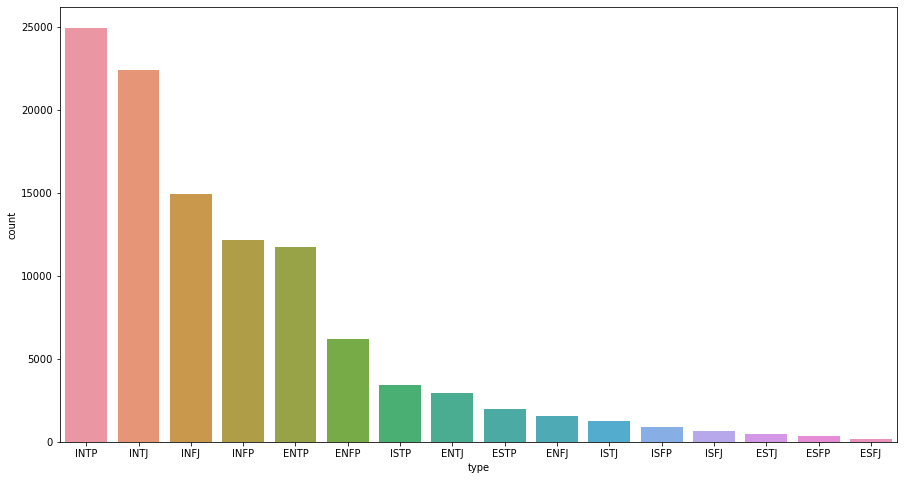

In [9]:
plt.figure(figsize=(15,8))

sns.countplot(df['type'], order = df['type'].value_counts().index)

In [10]:
df['type'].value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [12]:
df.columns = ['text', 'type']
df = df[['type', 'text']]

In [13]:
df.head()

,type,text
0,INTJ,know intj tool use interaction people excuse a...
1,INTJ,rap music ehh opp yeah know valid well know fa...
2,INTJ,preferably p hd low except wew lad video p min...
3,INTJ,drink like wish could drink red wine give head...
4,INTJ,space program ah bad deal meing freelance max ...


In [14]:
print(f"Total of {len(df['type'].unique())} types of classified MBTI posts")

Total of 16 types of classified MBTI posts


# 결측치 확인

In [15]:
df.isnull().sum()

type    0
text    0
dtype: int64

# 데이터 전처리 / Train, Validation, Test 분할

In [16]:
#function to clean the text data
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.text):
        sentence=sentence.lower()
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

df.text, _=clear_text(df)

100%|████████████████████████████████████████████████████████████████████████| 106067/106067 [00:54<00:00, 1943.68it/s]


## ~~Train : Valid : Test = 7:1:2~~
## Train : Test = 8:2

In [17]:
df

,type,text
0,INTJ,know intj tool use interaction people excuse a...
1,INTJ,rap music ehh opp yeah know valid well know fa...
2,INTJ,preferably p hd low except wew lad video p min...
3,INTJ,drink like wish could drink red wine give head...
4,INTJ,space program ah bad deal meing freelance max ...
...,...,...
106062,INFP,stay frustrate world life want take long nap w...
106063,INFP,fizzle around time mention sure mistake thing ...
106064,INFP,schedule modify hey w intp strong wing underst...
106065,INFP,enfj since january busy schedule able spend li...


In [18]:
X = df['text'] # features
y = df['type']  # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=5)

# Train

In [19]:
# Creating an instance to vectorizer:
vectorizer = TfidfVectorizer(sublinear_tf = True)
    
# Training the vectorizer:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [20]:
X_train_tfidf

<84853x222874 sparse matrix of type '<class 'numpy.float64'>'
	with 28517252 stored elements in Compressed Sparse Row format>

In [ ]:
# Training the classifier:    
clf = svm.SVC(kernel='rbf') # kernel tune
clf.fit(X_train_tfidf, y_train)

# clf = svm.SVC(kernel='linear')

## TEST PIPE

In [ ]:
# Pipelining the vectorizer and the classifier
tfidf_tuple = ('tfidf', TfidfVectorizer(sublinear_tf = True))
model_tuple = ('svc', svm.SVC(kernel='rbf'))

pipe = Pipeline([tfidf_tuple, model_tuple])
pipe.fit(X_train, y_train)

In [ ]:
values = np.array([0.01, 0.1, 1, 10])
values2 = np.array([1, 0.1, 0.01, 0.001])
params = {'C':values, 
          'gamma':values2}

grid = GridSearchCV(pipe, param_grid=params, cv = 5)
grid.fit(X_train, y_train)

In [ ]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

In [ ]:
values = np.array([0.1, 0.3, 0.5, 1, 3, 5, 10])
params = {'svc__C':values}

grid = GridSearchCV(pipe, param_grid=params, cv = 5)
grid.fit(X_train, y_train)

In [ ]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

In [37]:
grid.cv_results_

{'mean_fit_time': array([32.32575336, 36.6898807 , 32.91465273, 39.00875678, 46.52017965,
        52.33708229, 56.35301342]),
 'std_fit_time': array([0.56845233, 5.91530797, 0.30325683, 2.43768877, 1.67704794,
        2.4284862 , 2.70954098]),
 'mean_score_time': array([5.71306524, 5.82724156, 5.47700653, 5.99493818, 5.96061187,
        6.41859894, 5.48076892]),
 'std_score_time': array([0.23237115, 0.22803257, 0.17479374, 0.39035354, 0.30076793,
        0.74396886, 0.1828654 ]),
 'param_svc__C': masked_array(data=[0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__C': 0.1},
  {'svc__C': 0.3},
  {'svc__C': 0.5},
  {'svc__C': 1.0},
  {'svc__C': 3.0},
  {'svc__C': 5.0},
  {'svc__C': 10.0}],
 'split0_test_score': array([0.83442343, 0.84497083, 0.84638501, 0.84373343, 0.83406988,
        0.82829533, 0.82187261]),
 'split1_test_score': array([0.83412881, 0.84231925,

# test Set 사용하여 정확도 측정

In [19]:
text_clf = Pipeline([('tfidf',TfidfVectorizer(sublinear_tf = True)),('clf',LinearSVC(C = 0.5))])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(sublinear_tf=True)),
                ('clf', LinearSVC(C=0.5))])

In [24]:
predictions = text_clf.predict(X_test)

In [25]:
predictions

array(['INTP', 'INTJ', 'INTP', ..., 'INFJ', 'ENTP', 'INFJ'], dtype=object)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.90      0.61      0.73       319
        ENFP       0.84      0.79      0.82      1249
        ENTJ       0.91      0.80      0.85       577
        ENTP       0.88      0.84      0.86      2324
        ESFJ       1.00      0.42      0.60        33
        ESFP       0.89      0.44      0.59        75
        ESTJ       0.95      0.82      0.88       105
        ESTP       0.95      0.91      0.93       398
        INFJ       0.83      0.86      0.85      2954
        INFP       0.81      0.84      0.83      2391
        INTJ       0.85      0.89      0.86      4531
        INTP       0.85      0.89      0.87      5033
        ISFJ       0.85      0.54      0.66       132
        ISFP       0.81      0.59      0.68       161
        ISTJ       0.90      0.67      0.77       253
        ISTP       0.89      0.82      0.85       679

    accuracy                           0.85     21214
   macro avg       0.88   

In [30]:
print(f"Overall accuracy of the model: {round(metrics.accuracy_score(y_test, predictions),4)}")

Overall accuracy of the model: 0.85


---

### 결과 저장소

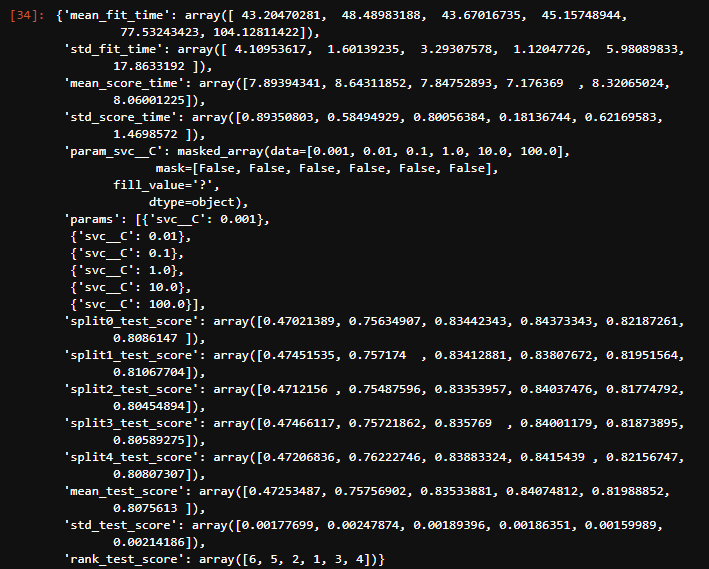

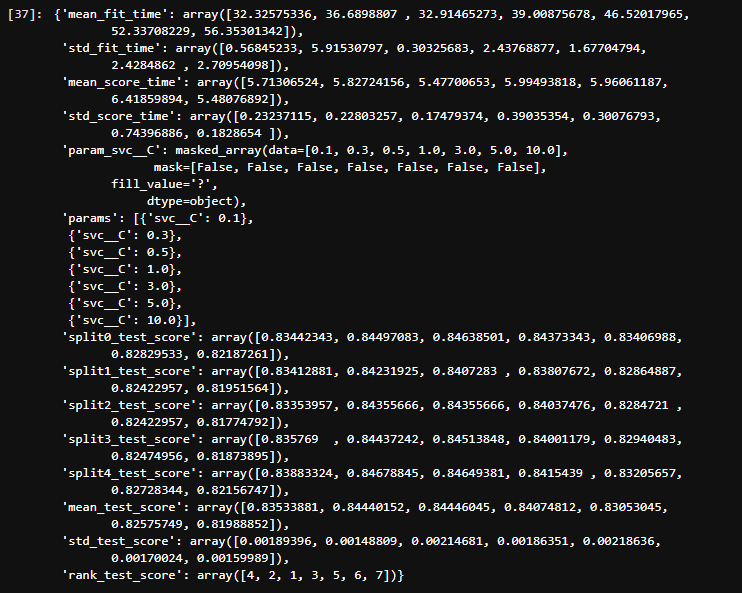